# Nonlinear Inverse Problems

## Introduction

Inverse problems are fundamental in geophysics, where we seek to determine subsurface properties (model parameters) from observed data. Unlike linear inverse problems, **nonlinear inverse problems** involve a nonlinear relationship between the model parameters **m** and the predicted data **d**:

$$\mathbf{d} = \mathbf{g}(\mathbf{m})$$

where $\mathbf{g}(\mathbf{m})$ is a nonlinear forward modeling function. The goal is to find the model parameters **m** that best fit the observed data $\mathbf{d}_{obs}$ by minimizing an objective function, typically the least-squares misfit:

$$\phi(\mathbf{m}) = ||\mathbf{g}(\mathbf{m}) - \mathbf{d}_{obs}||^2$$

## Iterative Solution Methods

Since nonlinear problems cannot be solved directly, we use iterative methods that start with an initial model $\mathbf{m}_0$ and update it through successive iterations:

$$\mathbf{m}_{k+1} = \mathbf{m}_k + \alpha_k \Delta\mathbf{m}_k$$

where $\alpha_k$ is the step length and $\Delta\mathbf{m}_k$ is the model update direction.

### 1. Newton's Method

Newton's method uses both first and second derivatives of the objective function. The model update is given by:

$$\Delta\mathbf{m}_k = -\mathbf{H}^{-1}_k \mathbf{g}_k$$

where:
- $\mathbf{g}_k = \nabla\phi(\mathbf{m}_k)$ is the gradient vector
- $\mathbf{H}_k = \nabla^2\phi(\mathbf{m}_k)$ is the Hessian matrix

**Advantages:** Quadratic convergence near the solution  
**Disadvantages:** Requires computing and inverting the full Hessian matrix, which is computationally expensive

### 2. Gauss-Newton Method

The Gauss-Newton method approximates the Hessian by neglecting second-order terms, using only the Jacobian matrix $\mathbf{J}$:

$$\Delta\mathbf{m}_k = -(\mathbf{J}_k^T\mathbf{J}_k)^{-1}\mathbf{J}_k^T\mathbf{r}_k$$

where:
- $\mathbf{J}_k$ is the Jacobian matrix with elements $J_{ij} = \frac{\partial g_i(\mathbf{m}_k)}{\partial m_j}$
- $\mathbf{r}_k = \mathbf{g}(\mathbf{m}_k) - \mathbf{d}_{obs}$ is the residual vector

**Advantages:** Computationally more efficient than Newton's method  
**Disadvantages:** May not converge if $\mathbf{J}_k^T\mathbf{J}_k$ is singular or poorly conditioned

### 3. Levenberg-Marquardt Method

The Levenberg-Marquardt method combines the advantages of both Newton and Gauss-Newton methods by adding a damping parameter $\lambda$:

$$\Delta\mathbf{m}_k = -(\mathbf{J}_k^T\mathbf{J}_k + \lambda_k\mathbf{I})^{-1}\mathbf{J}_k^T\mathbf{r}_k$$

The damping parameter $\lambda_k$ is adaptively adjusted:
- **Large $\lambda$:** Behaves like steepest descent (stable but slow)
- **Small $\lambda$:** Behaves like Gauss-Newton (fast but potentially unstable)

**Advantages:** 
- Robust convergence properties
- Automatically switches between steepest descent and Gauss-Newton behavior
- Handles poorly conditioned problems well

**Disadvantages:** Requires tuning of the damping parameter



Calculating linear objective function...
Calculating nonlinear objective function...
Calculating nonlinear objective function...


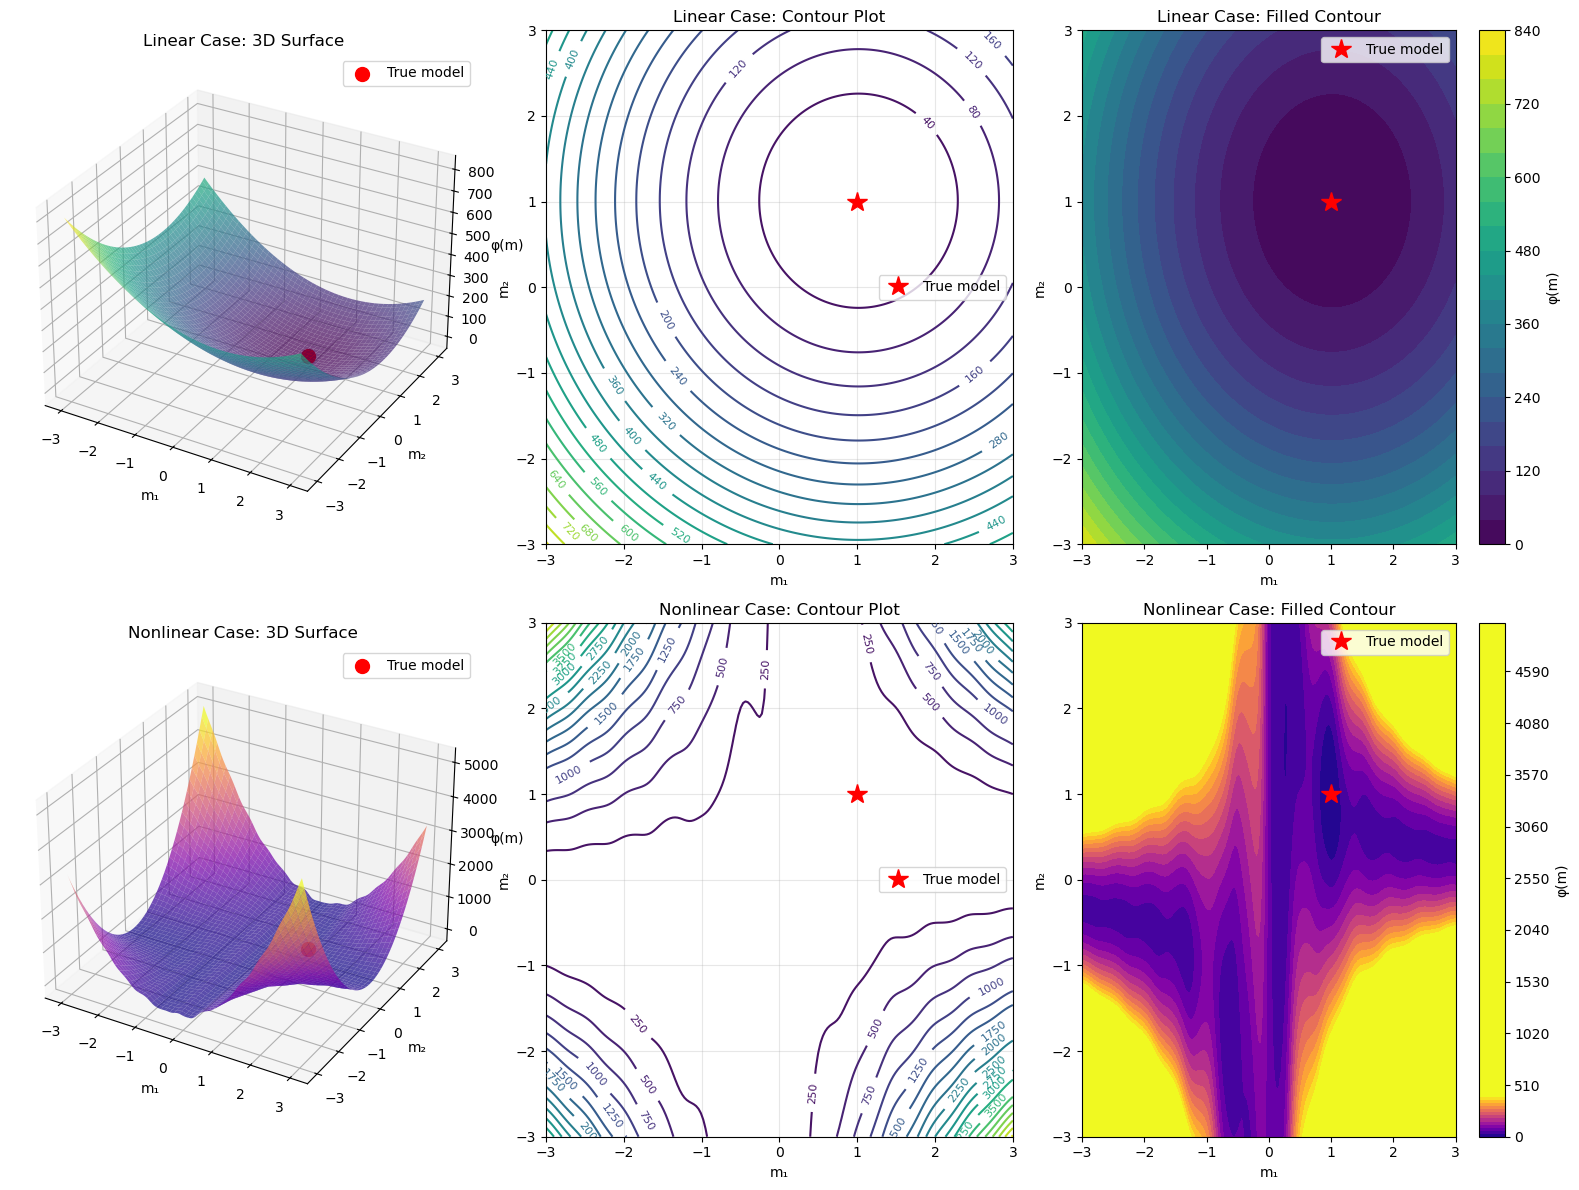


ANALYSIS OF OBJECTIVE FUNCTIONS
True model (linear case): m₁ = 1, m₂ = 1
True model (nonlinear case): m₁ = 1, m₂ = 1

Minimum φ(m) - Linear case: 0.104878
Minimum φ(m) - Nonlinear case: 0.308609


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the parameter space
m1_range = np.linspace(-3, 3, 200)
m2_range = np.linspace(-3, 3, 200)
M1, M2 = np.meshgrid(m1_range, m2_range)

# True model parameters
m_true = np.array([1, 1])

# Generate synthetic observed data for both cases
np.random.seed(42)  # For reproducibility
n_data = 50
x_obs = np.linspace(0, 2*np.pi, n_data)

def linear_forward_model(m, x):
    """Linear forward model: d = m1 * sin(x) + m2 * cos(x)"""
    return m[0] * np.sin(2*x) + m[1] * np.cos(2*x)

def nonlinear_forward_model(m, x):
    """Nonlinear forward model: d =   sin(m1 * x) + m1 * m2 """
    return  np.sin(2 * m[0] * x) + m[0] * m[1]

# Generate observed data with noise
d_obs_linear_clean = linear_forward_model(m_true, x_obs)
d_obs_nonlinear_clean = nonlinear_forward_model(m_true, x_obs)

# Add realistic noise (5% of signal RMS for both cases)
noise_level_linear = 0.05 * np.sqrt(np.mean(d_obs_linear_clean**2))
noise_level_nonlinear = 0.05 * np.sqrt(np.mean(d_obs_nonlinear_clean**2))

noise_linear = np.random.normal(0, noise_level_linear, n_data)
noise_nonlinear = np.random.normal(0, noise_level_nonlinear, n_data)

d_obs_linear = d_obs_linear_clean + noise_linear
d_obs_nonlinear = d_obs_nonlinear_clean + noise_nonlinear


def objective_function_linear(m1, m2):
    """Linear objective function φ(m) = ||G*m - d_obs||²"""
    # Handle both scalar and array inputs
    if np.isscalar(m1) and np.isscalar(m2):
        m = np.array([m1, m2])
        d_pred = linear_forward_model(m, x_obs)
        residual = d_pred - d_obs_linear
        return np.sum(residual**2)
    else:
        phi = np.zeros_like(m1)
        for i in range(m1.shape[0]):
            for j in range(m1.shape[1]):
                m = np.array([m1[i,j], m2[i,j]])
                d_pred = linear_forward_model(m, x_obs)
                residual = d_pred - d_obs_linear
                phi[i,j] = np.sum(residual**2)
        return phi

def objective_function_nonlinear(m1, m2):
    """Nonlinear objective function φ(m) = ||g(m) - d_obs||²"""
    # Handle both scalar and array inputs
    if np.isscalar(m1) and np.isscalar(m2):
        m = np.array([m1, m2])
        d_pred = nonlinear_forward_model(m, x_obs)
        residual = d_pred - d_obs_nonlinear
        return np.sum(residual**2)
    else:
        phi = np.zeros_like(m1)
        for i in range(m1.shape[0]):
            for j in range(m1.shape[1]):
                m = np.array([m1[i,j], m2[i,j]])
                d_pred = nonlinear_forward_model(m, x_obs)
                residual = d_pred - d_obs_nonlinear
                phi[i,j] = np.sum(residual**2)
        return phi

# Calculate objective functions
print("Calculating linear objective function...")
phi_linear = objective_function_linear(M1, M2)

print("Calculating nonlinear objective function...")
phi_nonlinear = objective_function_nonlinear(M1, M2)

# Create the plots
fig = plt.figure(figsize=(16, 12))

# Linear case - 3D surface
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
surf1 = ax1.plot_surface(M1, M2, phi_linear, cmap='viridis', alpha=0.7)
ax1.scatter(m_true[0], m_true[1], objective_function_linear(m_true[0], m_true[1]), 
           color='red', s=100, label='True model')
ax1.set_xlabel('m₁')
ax1.set_ylabel('m₂')
ax1.set_zlabel('φ(m)')
ax1.set_title('Linear Case: 3D Surface')
ax1.legend()

# Linear case - contour plot
ax2 = fig.add_subplot(2, 3, 2)
contour1 = ax2.contour(M1, M2, phi_linear, levels=20)
ax2.clabel(contour1, inline=True, fontsize=8)
ax2.plot(m_true[0], m_true[1], 'r*', markersize=15, label='True model')
ax2.set_xlabel('m₁')
ax2.set_ylabel('m₂')
ax2.set_title('Linear Case: Contour Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Linear case - filled contour
ax3 = fig.add_subplot(2, 3, 3)
contourf1 = ax3.contourf(M1, M2, phi_linear, levels=20, cmap='viridis')
plt.colorbar(contourf1, ax=ax3, label='φ(m)')
ax3.plot(m_true[0], m_true[1], 'r*', markersize=15, label='True model')
ax3.set_xlabel('m₁')
ax3.set_ylabel('m₂')
ax3.set_title('Linear Case: Filled Contour')
ax3.legend()

# Nonlinear case - 3D surface
ax4 = fig.add_subplot(2, 3, 4, projection='3d')
surf2 = ax4.plot_surface(M1, M2, phi_nonlinear, cmap='plasma', alpha=0.7)
ax4.scatter(m_true[0], m_true[1], 
           objective_function_nonlinear(m_true[0], m_true[1]), 
           color='red', s=100, label='True model')
ax4.set_xlabel('m₁')
ax4.set_ylabel('m₂')
ax4.set_zlabel('φ(m)')
ax4.set_title('Nonlinear Case: 3D Surface')
ax4.legend()

# Nonlinear case - contour plot
ax5 = fig.add_subplot(2, 3, 5)
contour2 = ax5.contour(M1, M2, phi_nonlinear, levels=20)
ax5.clabel(contour2, inline=True, fontsize=8)
ax5.plot(m_true[0], m_true[1], 'r*', markersize=15, label='True model')
ax5.set_xlabel('m₁')
ax5.set_ylabel('m₂')
ax5.set_title('Nonlinear Case: Contour Plot')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Nonlinear case - filled contour
ax6 = fig.add_subplot(2, 3, 6)
contourf2 = ax6.contourf(M1, M2, phi_nonlinear, levels=200, cmap='plasma', vmin=0, vmax=400)
plt.colorbar(contourf2, ax=ax6, label='φ(m)')
ax6.plot(m_true[0], m_true[1], 'r*', markersize=15, label='True model')
ax6.set_xlabel('m₁')
ax6.set_ylabel('m₂')
ax6.set_title('Nonlinear Case: Filled Contour')
ax6.legend()

plt.tight_layout()
plt.show()

# Print some analysis
print("\n" + "="*60)
print("ANALYSIS OF OBJECTIVE FUNCTIONS")
print("="*60)
print(f"True model (linear case): m₁ = {m_true[0]}, m₂ = {m_true[1]}")
print(f"True model (nonlinear case): m₁ = {m_true[0]}, m₂ = {m_true[1]}")

# Find minimum values
min_linear = np.min(phi_linear)
min_nonlinear = np.min(phi_nonlinear)
print(f"\nMinimum φ(m) - Linear case: {min_linear:.6f}")
print(f"Minimum φ(m) - Nonlinear case: {min_nonlinear:.6f}")




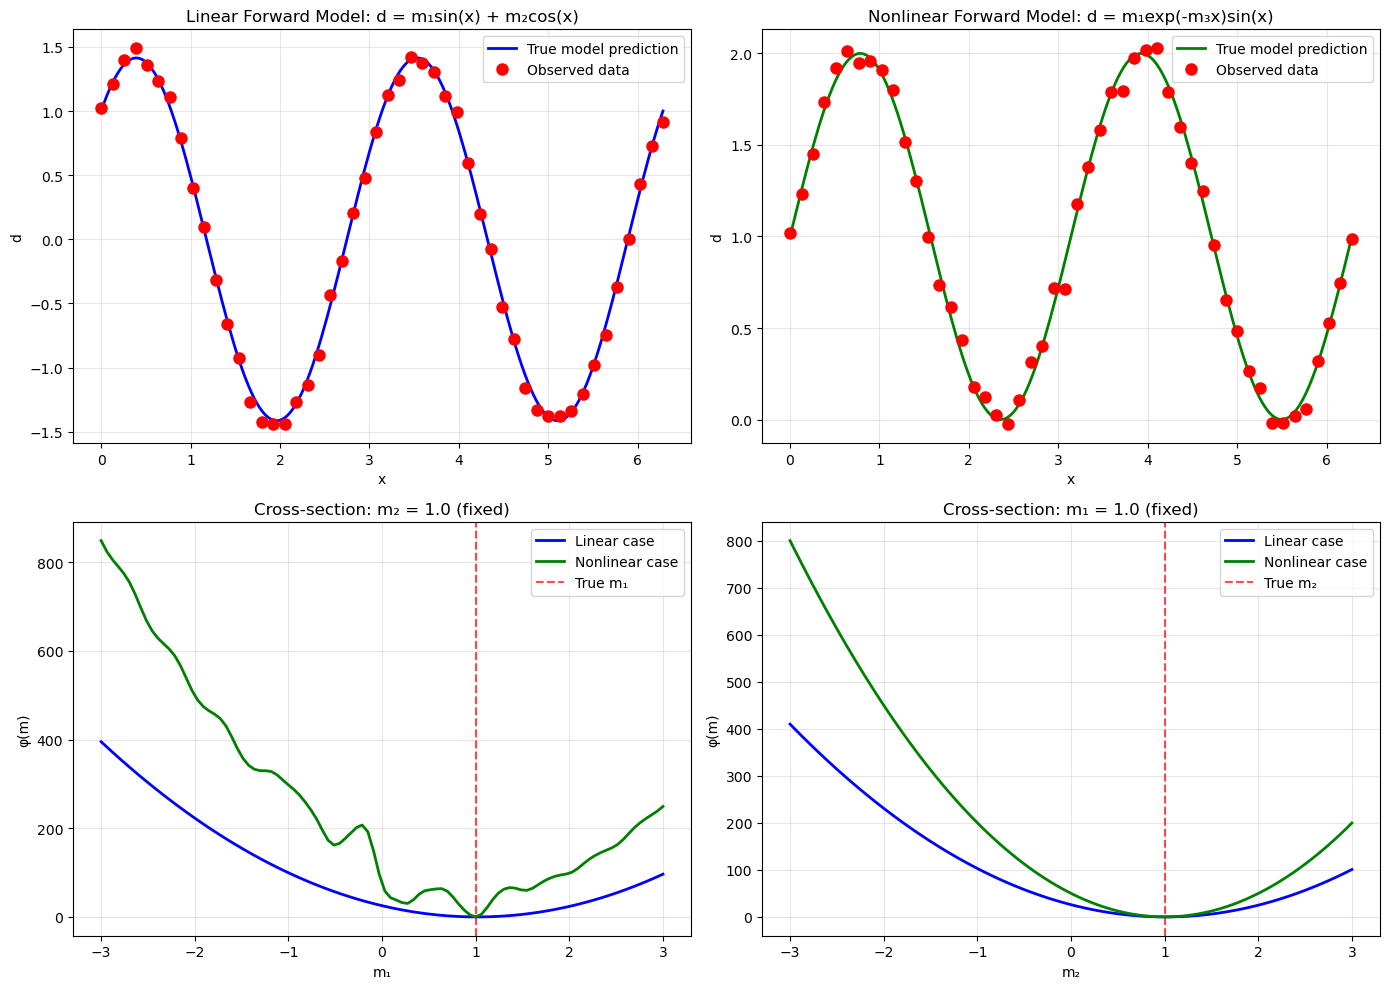


KEY DIFFERENCES BETWEEN LINEAR AND NONLINEAR CASES

1. OBJECTIVE FUNCTION SHAPE:
   • Linear: Perfect elliptical contours (quadratic)
   • Nonlinear: Irregular, potentially multi-modal

2. OPTIMIZATION IMPLICATIONS:
   • Linear: Single global minimum, predictable convergence
   • Nonlinear: May have local minima, convergence depends on starting point

3. GRADIENT BEHAVIOR:
   • Linear: Constant curvature, uniform convergence rate
   • Nonlinear: Variable curvature, convergence rate varies with location

4. PRACTICAL CONSEQUENCES:
   • Linear: Any optimization method will find the global minimum
   • Nonlinear: Requires careful choice of initial model and robust methods


In [18]:
# Visualize the forward models and data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Plot the forward models
x_fine = np.linspace(0, 2*np.pi, 200)

# Linear forward model
d_linear_fine = linear_forward_model(m_true, x_fine)
ax1.plot(x_fine, d_linear_fine, 'b-', linewidth=2, label='True model prediction')
ax1.plot(x_obs, d_obs_linear, 'ro', markersize=8, label='Observed data')
ax1.set_xlabel('x')
ax1.set_ylabel('d')
ax1.set_title('Linear Forward Model: d = m₁sin(x) + m₂cos(x)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Nonlinear forward model
d_nonlinear_fine = nonlinear_forward_model(m_true, x_fine)
ax2.plot(x_fine, d_nonlinear_fine, 'g-', linewidth=2, label='True model prediction')
ax2.plot(x_obs, d_obs_nonlinear, 'ro', markersize=8, label='Observed data')
ax2.set_xlabel('x')
ax2.set_ylabel('d')
ax2.set_title('Nonlinear Forward Model: d = m₁exp(-m₃x)sin(x)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Show cross-sections of the objective functions
# Cross-section through the true model (varying m1, fixing m2)
m1_cross = np.linspace(-3, 3, 100)
phi_linear_cross = []
phi_nonlinear_cross = []

for m1_val in m1_cross:
    phi_linear_cross.append(objective_function_linear(m1_val, m_true[1]))
    phi_nonlinear_cross.append(objective_function_nonlinear(m1_val, m_true[1]))

ax3.plot(m1_cross, phi_linear_cross, 'b-', linewidth=2, label='Linear case')
ax3.plot(m1_cross, phi_nonlinear_cross, 'g-', linewidth=2, label='Nonlinear case')
ax3.axvline(m_true[0], color='r', linestyle='--', alpha=0.7, label='True m₁')
ax3.set_xlabel('m₁')
ax3.set_ylabel('φ(m)')
ax3.set_title(f'Cross-section: m₂ = {m_true[1]:.1f} (fixed)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Cross-section through the true model (varying m2, fixing m1)
m2_cross = np.linspace(-3, 3, 100)
phi_linear_cross2 = []
phi_nonlinear_cross2 = []

for m2_val in m2_cross:
    phi_linear_cross2.append(objective_function_linear(m_true[0], m2_val))
    phi_nonlinear_cross2.append(objective_function_nonlinear(m_true[0], m2_val))

ax4.plot(m2_cross, phi_linear_cross2, 'b-', linewidth=2, label='Linear case')
ax4.plot(m2_cross, phi_nonlinear_cross2, 'g-', linewidth=2, label='Nonlinear case')
ax4.axvline(m_true[1], color='r', linestyle='--', alpha=0.7, label='True m₂')
ax4.set_xlabel('m₂')
ax4.set_ylabel('φ(m)')
ax4.set_title(f'Cross-section: m₁ = {m_true[0]:.1f} (fixed)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY DIFFERENCES BETWEEN LINEAR AND NONLINEAR CASES")
print("="*60)
print("\n1. OBJECTIVE FUNCTION SHAPE:")
print("   • Linear: Perfect elliptical contours (quadratic)")
print("   • Nonlinear: Irregular, potentially multi-modal")

print("\n2. OPTIMIZATION IMPLICATIONS:")
print("   • Linear: Single global minimum, predictable convergence")
print("   • Nonlinear: May have local minima, convergence depends on starting point")

print("\n3. GRADIENT BEHAVIOR:")
print("   • Linear: Constant curvature, uniform convergence rate")
print("   • Nonlinear: Variable curvature, convergence rate varies with location")

print("\n4. PRACTICAL CONSEQUENCES:")
print("   • Linear: Any optimization method will find the global minimum")
print("   • Nonlinear: Requires careful choice of initial model and robust methods")

# Derivation of Gauss-Newton and Levenberg-Marquardt Methods

Below is section 9.2 from Aster, Borchers, Thurber 2005. 


![Gauss-Newton 1](GaussNewton1.png)


![Gauss-Newton 2](GaussNewton2.png)


![Gauss-Newton 3](GaussNewton3.png)

